In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [8]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\PAVILION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
df_test = pd.read_parquet('test.parquet', engine= 'auto')
df_train = pd.read_parquet('train.parquet')

In [3]:
# Leemos los Parquet con Pandas

In [36]:
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [37]:
df_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [38]:
df_train.shape

(346479, 22)

In [39]:
df_test.shape

(38498, 21)

In [7]:
# Tenemos muchisimos datos, asi que tendremos que limpiarlos primero y decidir cuales datos usaremos y cuales no ! 
# Para despues desarrolar nuestro modelo de Machine Learning

In [8]:
print(df_train.keys())
print(df_test.keys())

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')
Index(['id', 'url', 'region', 'region_url', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'image_url', 'description', 'lat', 'long', 'state'],
      dtype='object')


In [9]:
df_train.describe() 

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [11]:
df_train.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

In [12]:
df_train[df_train.duplicated()]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


In [13]:
# Podemos ver que no tenemos datos duplicados en nuestro dataset de entrenamiento

In [ ]:
# Feature Engineering 

In [41]:
df_reducido = df_train.sample(frac=.005)

In [14]:
len(df_reducido)

1732

In [ ]:
sns.displot(df_reducido['price'])

<AxesSubplot: xlabel='price', ylabel='Density'>

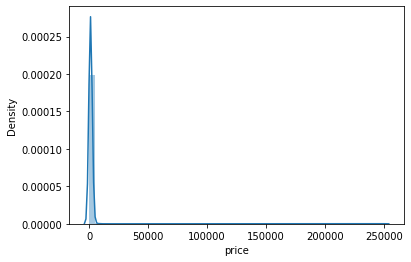

In [42]:
sns.distplot(df_reducido["price"])

In [16]:
correlations = df_train.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

price                      1.000000
dogs_allowed               0.001044
cats_allowed               0.001026
smoking_allowed            0.001024
long                       0.000810
baths                      0.000156
beds                       0.000071
sqfeet                     0.000008
electric_vehicle_charge   -0.000186
comes_furnished           -0.000374
wheelchair_access         -0.000423
id                        -0.001062
lat                       -0.001486
Name: price, dtype: float64

In [ ]:
# No vemos ninguna correlacion fuerte entre las variables y el precio

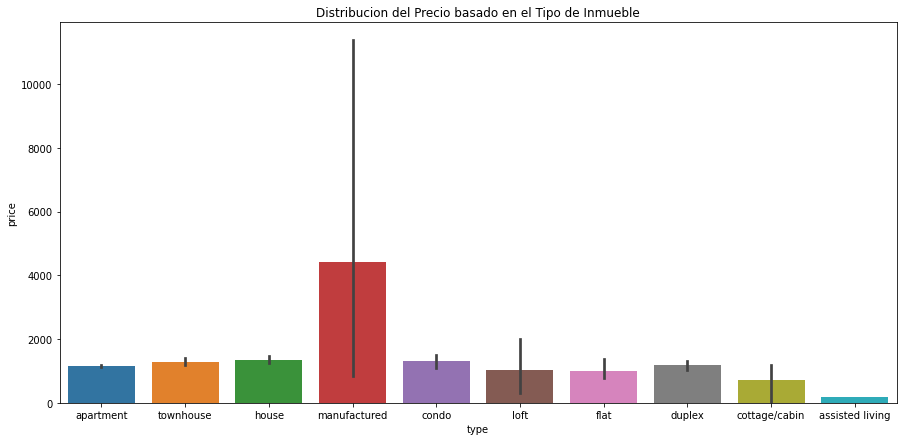

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x="type", y="price", data=df_reducido)
plt.title("Distribucion del Precio basado en el Tipo de Inmueble")
plt.show()

In [18]:
# Podemos ver como la todos los precios de los Tipos de Inmuebles son parecidos excepto por los Manufactured, donde econtramos toda clase de Precios

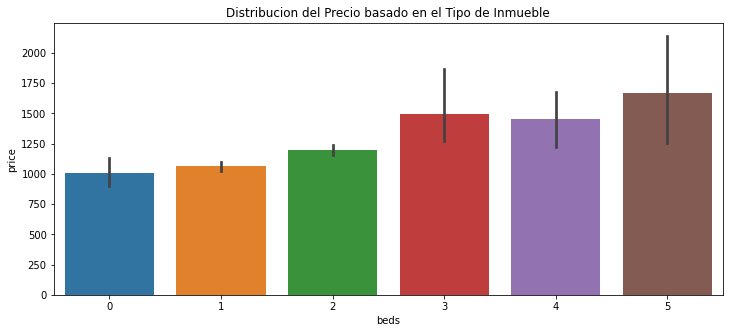

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x="beds", y="price", data=df_reducido)
plt.title("Distribucion del Precio basado en el Tipo de Inmueble")
plt.show()

In [20]:
# Vamos a prescindir de las columnas id, url, region_url, image_url, description'
# Considero que estas variables no son importantes a la hora de predecir la estadia total de un paciente

In [43]:
df_reducido.drop(['id','url', 'region_url', 'image_url', 'description'], axis=1, inplace=True)
df_train.drop(['id','url', 'region_url', 'image_url', 'description'], axis=1, inplace=True)
df_test.drop(['id','url', 'region_url', 'image_url', 'description'], axis=1, inplace=True)

In [44]:
df_train.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,co
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,va
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,None,33.5623,-112.0560,az
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,tn


In [23]:
# Ahora necesitamos pasar los precios a valores de 0 y 1, donde 0 son las propiedades que valen menos de 1000 y 0 las que valen mas de 1000

In [45]:
df_train['price'].where(df_train['price'] > 1000, 1, inplace= True)
df_train['price'].where(df_train['price'] < 1000, 0, inplace= True)

In [49]:
df_train.head(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,boise,0,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id
1,colorado springs,0,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,co
2,norfolk / hampton roads,0,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,va
3,phoenix,0,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,None,33.5623,-112.0560,az
4,nashville,1,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,tn
5,dallas / fort worth,0,house,1649,3,2.0,1,1,1,0,0,0,w/d hookups,attached garage,33.0198,-96.9925,tx
6,worcester / central MA,0,apartment,1150,3,1.0,1,1,1,0,0,0,w/d in unit,off-street parking,42.2470,-71.7872,ma
7,wichita,1,apartment,1050,3,2.0,1,1,1,0,0,0,w/d hookups,None,37.6985,-97.1179,ks
8,scranton / wilkes-barre,1,apartment,1200,3,1.5,0,0,1,0,0,0,w/d hookups,off-street parking,41.2689,-75.8453,pa
9,boise,0,apartment,1230,3,2.0,1,1,0,0,0,0,w/d in unit,carport,43.6264,-116.3930,id


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   346479 non-null  object 
 1   price                    346479 non-null  int64  
 2   type                     346479 non-null  object 
 3   sqfeet                   346479 non-null  int64  
 4   beds                     346479 non-null  int64  
 5   baths                    346479 non-null  float64
 6   cats_allowed             346479 non-null  int64  
 7   dogs_allowed             346479 non-null  int64  
 8   smoking_allowed          346479 non-null  int64  
 9   wheelchair_access        346479 non-null  int64  
 10  electric_vehicle_charge  346479 non-null  int64  
 11  comes_furnished          346479 non-null  int64  
 12  laundry_options          275308 non-null  object 
 13  parking_options          219797 non-null  object 
 14  lat 

In [51]:
print(df_train.price.max())
print(df_train.price.min())

1
0


In [52]:
df_train.beds.max()

1100

In [53]:
df_train.baths.max()

75.0

In [54]:
df_train.sqfeet.max()

8388607

In [55]:
df_train.long.min()

-163.894

In [56]:
df_train.state.unique()

array(['id', 'co', 'va', 'az', 'tn', 'tx', 'ma', 'ks', 'pa', 'me', 'ms',
       'la', 'mn', 'ky', 'wa', 'al', 'ca', 'ga', 'nc', 'md', 'ia', 'fl',
       'or', 'ar', 'hi', 'nj', 'ut', 'wv', 'ny', 'sc', 'oh', 'mo', 'mi',
       'ak', 'sd', 'ok', 'dc', 'in', 'ct', 'ri', 'ne', 'nd', 'nv', 'wi',
       'nh', 'de', 'il', 'nm', 'mt', 'vt', 'wy'], dtype=object)

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [58]:
# Ahora necesitamos cambiar las variables categoricas a numeros, ya que nuestro modelo de Machine Learning solo acepta numeros para poder dar una prediccion
# Realizaremos este proceso con LabelEncoder para asignar un numero a cada variable diferente de cada columna 

In [59]:
df_train.region = le.fit_transform(df_train.region)
df_test.region = le.fit_transform(df_test.region)

df_train.type = le.fit_transform(df_train.type)
df_test.type = le.fit_transform(df_test.type)

df_train.laundry_options = le.fit_transform(df_train.laundry_options)
df_test.laundry_options = le.fit_transform(df_test.laundry_options)

df_train.parking_options = le.fit_transform(df_train.parking_options)
df_test.parking_options = le.fit_transform(df_test.parking_options)

df_train.state = le.fit_transform(df_train.state)
df_test.state = le.fit_transform(df_test.state)

In [60]:
df_train["lat"].fillna(df_train["lat"].median(), inplace=True) 
df_test["lat"].fillna(df_test["lat"].median(), inplace=True)


df_train["long"].fillna(df_train["long"].median(), inplace=True)
df_test["long"].fillna(df_test["long"].median(), inplace=True)

In [36]:
#Aqui inputamos la mediana a las columnas de 'lat' y 'long' ya que nuestro modelo de Machine Learning no los va a reconocer asi

In [37]:
# Si vemos los datos 'sqfeet', 'beds', 'baths', 'lat' y 'long' se desvian muchisimo respecto a los otros.
# Esto puede causar problemas en nuestro modelo ya que toma valores mas grandes como mas 'importantes'
# Asi que vamos a escalarlos usando StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [62]:
sqfeet_train = np.array(df_train["sqfeet"]).reshape(-1, 1)
sqfeet_test = np.array(df_test["sqfeet"]).reshape(-1, 1)
df_train["sqfeet"] = scaler.fit_transform(sqfeet_train)
df_test["sqfeet"] = scaler.fit_transform(sqfeet_test)

In [63]:
beds_train = np.array(df_train['beds']).reshape(-1, 1)
baths_train = np.array(df_train['baths']).reshape(-1, 1)
lat_train = np.array(df_train['lat']).reshape(-1, 1)
long_train = np.array(df_train['long']).reshape(-1, 1)

beds_test = np.array(df_test['beds']).reshape(-1, 1)
baths_test = np.array(df_test['baths']).reshape(-1, 1)
lat_test = np.array(df_test['lat']).reshape(-1, 1)
long_test = np.array(df_test['long']).reshape(-1, 1)

df_train['beds'] = scaler.fit_transform(beds_train)
df_train['baths'] = scaler.fit_transform(baths_train)
df_train['lat'] = scaler.fit_transform(lat_train)
df_train['long'] = scaler.fit_transform(long_train)

df_test['beds'] = scaler.fit_transform(beds_test)
df_test['baths'] = scaler.fit_transform(baths_test)
df_test['lat'] = scaler.fit_transform(lat_test)
df_test['long'] = scaler.fit_transform(long_test)

In [64]:
df_train.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,33,0,6,0.006622,0.030610,0.854361,1,1,1,0,0,0,4,2,1.146546,-1.425759,13
1,64,0,0,-0.018445,-0.285577,-0.789714,1,1,1,0,0,0,4,1,0.302909,-0.732693,5
2,236,0,0,-0.008240,0.030610,0.854361,0,0,1,0,0,0,3,4,-0.080226,1.000163,45
3,269,0,6,0.019949,0.346798,0.854361,1,1,1,0,0,0,4,7,-0.663534,-1.173300,3
4,230,1,0,-0.018148,-0.285577,-0.789714,1,1,1,0,0,0,4,1,-0.212549,0.364632,42


In [65]:
df_test.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,9,8,0.497780,0.189793,0.736728,0,0,1,0,0,0,4,4,0.966613,0.554921,22
1,370,0,0.069785,0.013283,-0.691397,0,0,1,0,0,0,3,4,1.222764,1.230279,46
2,9,0,0.215361,0.013283,0.736728,1,1,1,1,0,0,4,1,0.914855,0.542979,22
3,112,0,0.404611,0.013283,1.450791,1,1,0,0,0,0,4,0,0.605306,-0.759873,5
4,53,0,-0.318904,0.013283,-0.691397,1,1,1,0,0,0,1,7,0.157771,0.862207,45


In [66]:
df_train.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

In [44]:
# Ahora vamos a definir los sets de entrenamiento, quitamos la columna de Precio ya que no la queremos involucrar en nuestro entrenamiento
# Luego definimos la variable de Price como nuestra variable Target 
# X_predict es nuestro set con el cual predeciremos la variable target

In [67]:
X = df_train.drop(['price'], axis=1)
y = df_train['price']
X_predict = df_test

In [46]:
# Dividimos nuestro set de entrenamiento, esto nos ayudara a evaluar el performance de nuestro modelo y a que no haya overfitting

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Para este proyecto estaremos probando el modelo de Arbol de Decision, con una profundidad de 5 niveles 

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5, random_state = 42) 

In [70]:
# Entrenamos el modelo

clf.fit(X_train.values,y_train.values)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [71]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train.values)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test.values)

In [72]:
from sklearn.metrics import accuracy_score  # Vemos la precision del modelo

print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.76
Precisión en el set de testeo:  0.76


In [73]:
from sklearn.metrics import recall_score  # Hallamos el recall

recall = recall_score(y_test, y_test_pred, average= 'micro')
print(recall)

0.7616745555299007


In [88]:
# Ahora vamos a hacer las predicciones con el archivo .test que contiene 91000 filas y sacar esas predicciones a un .CSV

predicciones_final = clf.predict(X_predict)

predicciones = pd.DataFrame(predicciones_final, columns= ['pred'])

predicciones.to_csv('NicoGit333.csv', index= False)